# <p style="font-family:newtimeroman; font-size:175%; text-align:center; border-radius: 15px 50px;">House Prices - Advanced Regression Techniques Kaggle Competition </p> 
### The objective of this project is to build a Machine Learning model for the prediction of housing prices based on pattern extracted from analyzing 79 descriptive features like their Area, Street, Alley YearBuilt etc.


<p style="background-color:lightblue; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 10px 10px;">Contents:</p>

<ul>
    <li><a href="#head-1-1">Data Pre-processing</a>
        <ul>
           <li><a href="#head-1-2-1">Univariate Analysis</a>
           <li><a href="#head-1-2-1">Multivariate Analysis</a>
        </ul>
        <ul>
            <li><a href="#head-1-3">Data Cleaning</a>
                <ul>
            <li><a href="#head-1-3-1">Missing Values</a>
            <li><a href="#head-1-3-2">Outliers</a>
                </ul>
        </ul>

 <li><a href="#head-4">Modeling</a> 
     <ul>
          <li><a href="#head-4-1">Linear Regression: Ridge</a> 
          <li><a href="#head-4-2">Linear Regression: LassoCV</a> 
          <li><a href="#head-4-3">XGBoost</a>     
</ul>
    

In [43]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100

<a id="head-1-1"></a>
### Data Preprocessing

In [4]:
# Import data
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
test_id = test.reset_index().drop('index',axis=1)['Id']

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Looking at these features, I want to closely inspect SalePrice, BedroomAbvGr, YearBuilt, OverallQual

In [6]:
train.set_index('Id',drop=True, inplace=True)
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id="head-1-2-1"></a>
## Univariate Analysis
- Let's look at distribution of target variables: Sales Price

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

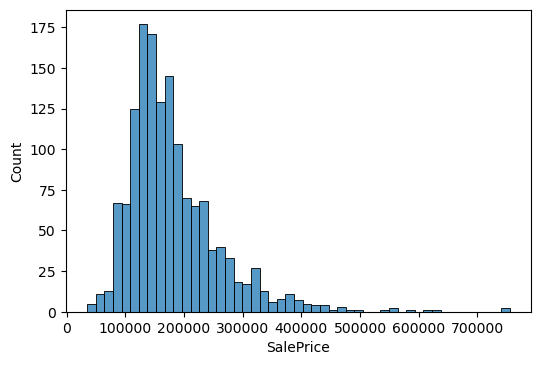

In [7]:
sns.histplot(train['SalePrice'])

- Can see that this series deviates from normal distribution
- right-skewed distribution (most sale prices from 0-300k)
- shows peakedness --> check kurtosis

In [8]:
train['SalePrice'].kurt()

6.536281860064529

- lets see the correlation between columns and target column to see which variables we should inspect more closely

In [9]:
# look at first 15 variables with highest correlation to Sales Price
corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)[1:15].to_frame()

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


<a id="head-1-2-2"></a>
## Multivariate Analysis
- Plot Sales Price with other variables to look at relationships
- Speculate that it is strongly correlated with features like: number of bedrooms, year built, living area, overall quality

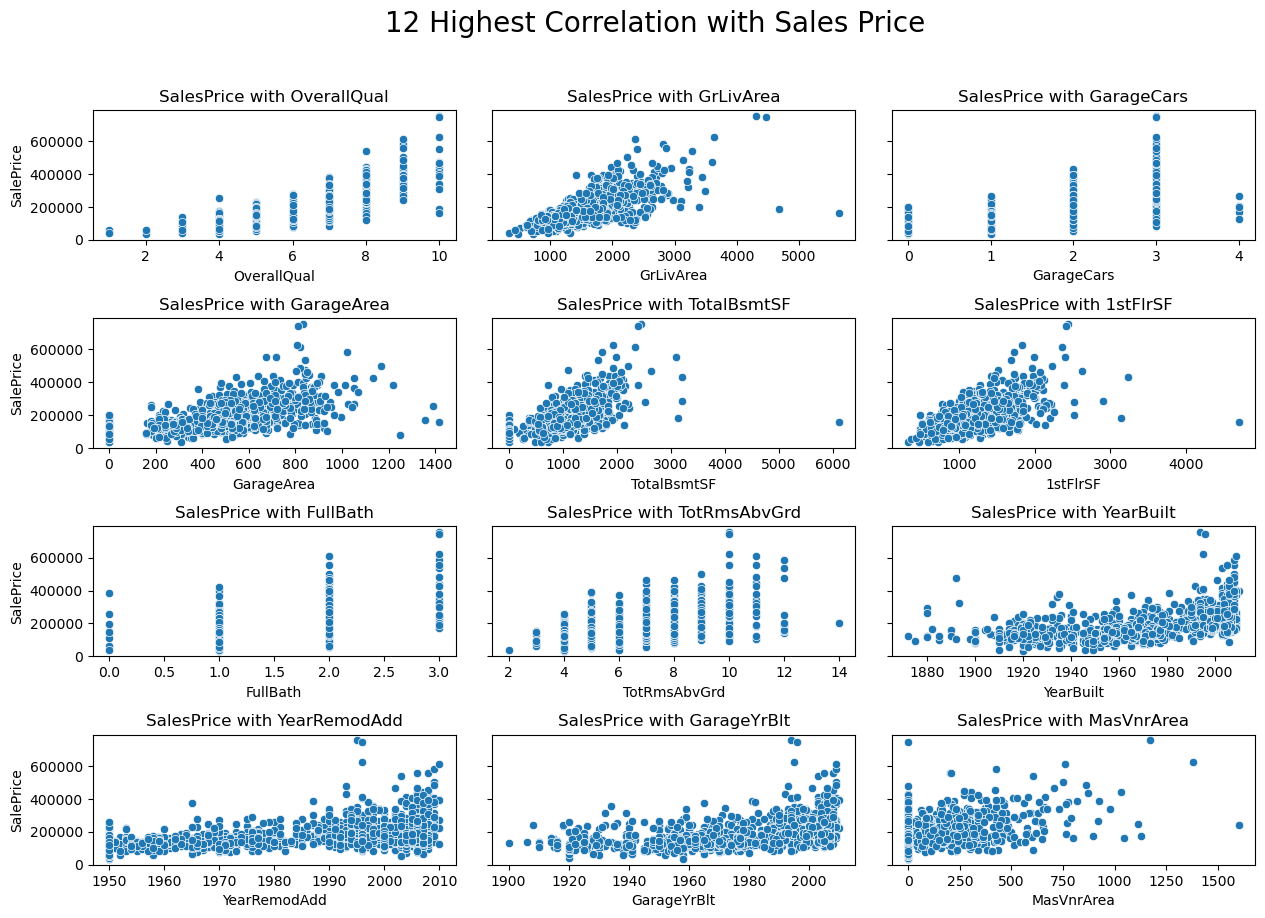

In [10]:
# Scatter plot columns with highest correlation with SalePrice

high_corr = corr['SalePrice'].sort_values(ascending=False)[1:][:13].index.tolist()

fig, axes = plt.subplots(4,3, figsize=(15, 10), sharey=True);
plt.subplots_adjust(hspace = 0.6, wspace=0.1)
fig.suptitle('12 Highest Correlation with Sales Price', fontsize=20)

for i,col in zip(range(12),high_corr):
    sns.scatterplot(y=train['SalePrice'], x=train[col], ax=axes[i//3][i%3])
    axes[i//3][i%3].set_title('SalesPrice with '+col)

Look closer at some particular features:

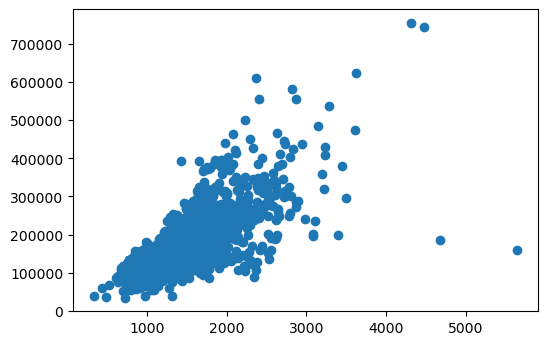

In [11]:
#scatter plot of Ground Living Area Square Feet/ Sale Price

plt.scatter(train['GrLivArea'], train['SalePrice'])

- seems to have a positive linear relationship

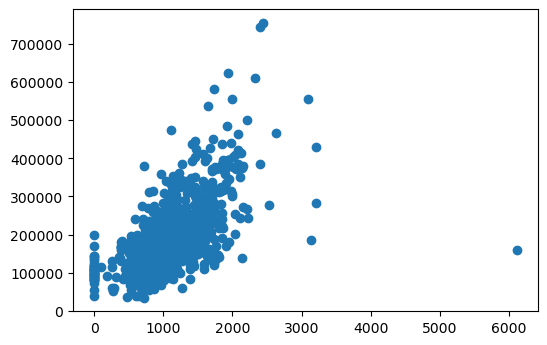

In [12]:
#scatter plot Total Basement Square feet/ Sale Price

plt.scatter(train['TotalBsmtSF'], train['SalePrice'])

- less strong linear relationship 

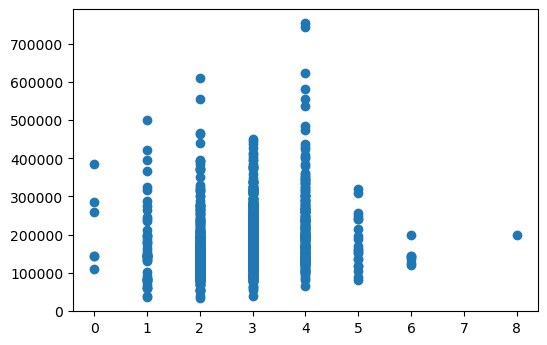

In [13]:
#scatter plot Bedrooms Above Ground/ Sale Price

plt.scatter(train['BedroomAbvGr'], train['SalePrice'])

In [14]:
# Categorial feature
train.OverallQual.head()

Id
1    7
2    6
3    7
4    7
5    8
Name: OverallQual, dtype: int64

- Overall quality has a strong correlation with Sales Price, but it is categorical; we can visualize in different ways

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

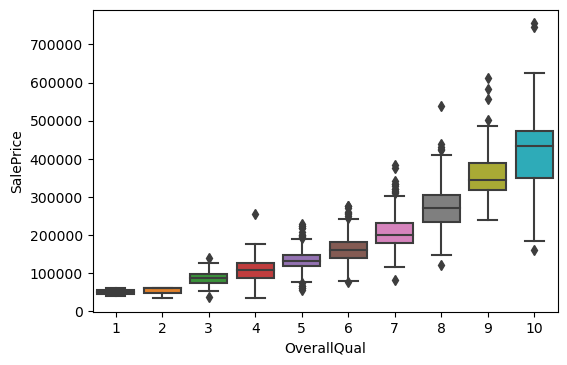

In [58]:
#box plot overallqual/saleprice

sns.boxplot(x='OverallQual', y="SalePrice", data=train)

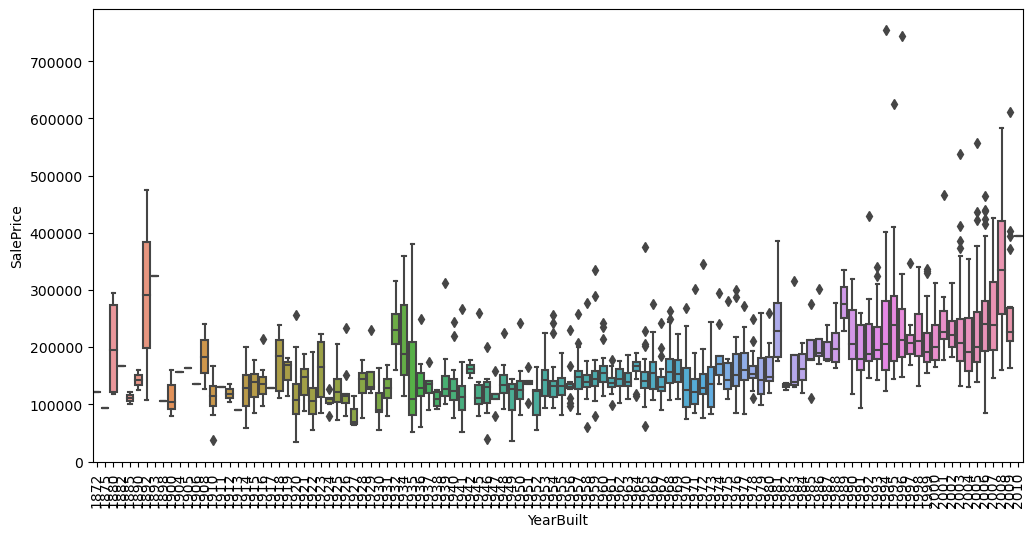

In [59]:
#box plot year built/saleprice
fig = plt.subplots(figsize=(12, 6))
sns.boxplot(x='YearBuilt', y="SalePrice", data=train)
plt.xticks(rotation=90);

- slighly increase in trend through the years, as expected

#### Some features seem to be very important while others are not, let's zoom out and look at the relationships between all the variables as at glance: correlation matrix heatmap

### Correlation Matrix Heatmap

<AxesSubplot:>

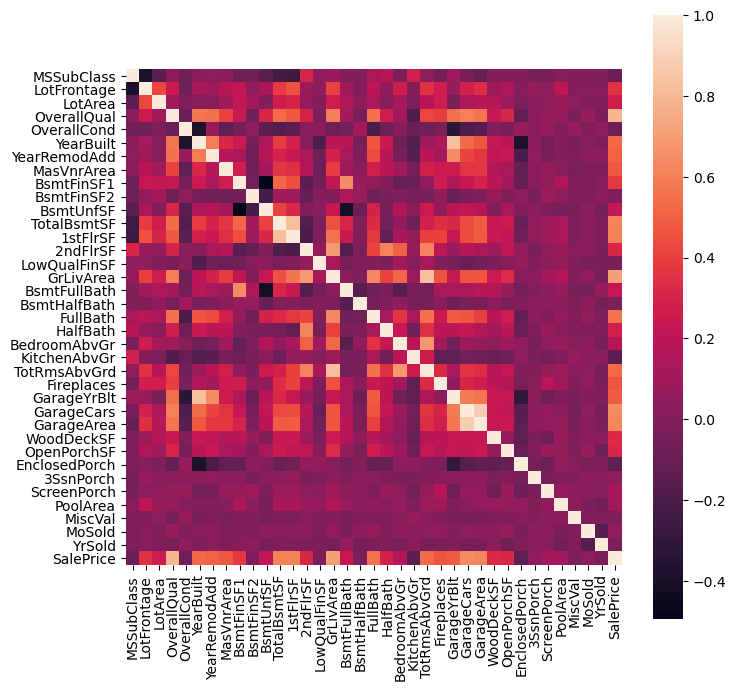

In [60]:
corrmat = train.corr()
fig = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat,square=True, xticklabels=True, yticklabels=True)

#### We can quickly see that the variables we just looked at (Overall quality, total bedrooms, living area...) are correlated with Sales Price, but we can also see variables we haven't looked at: TotalBsmtSF' and '1stFlrSF' 

### Sales Price Correlation Matrix

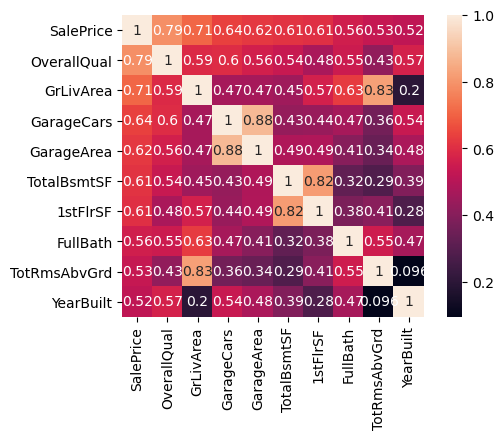

In [61]:
# look at top 10 variables for Sales Prie Correlation matrix heatmap
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- We can see from correlation matrix of full heatmap, and here that Garage Cars and Garage Area are very strongly correlated; drop the lowest correlated one (Garage Area)
- Same with Total Rooms Above Ground and Gr Living Area; drop Total Rooms above ground

#### Plot pairwise relationships of highest correlated variables

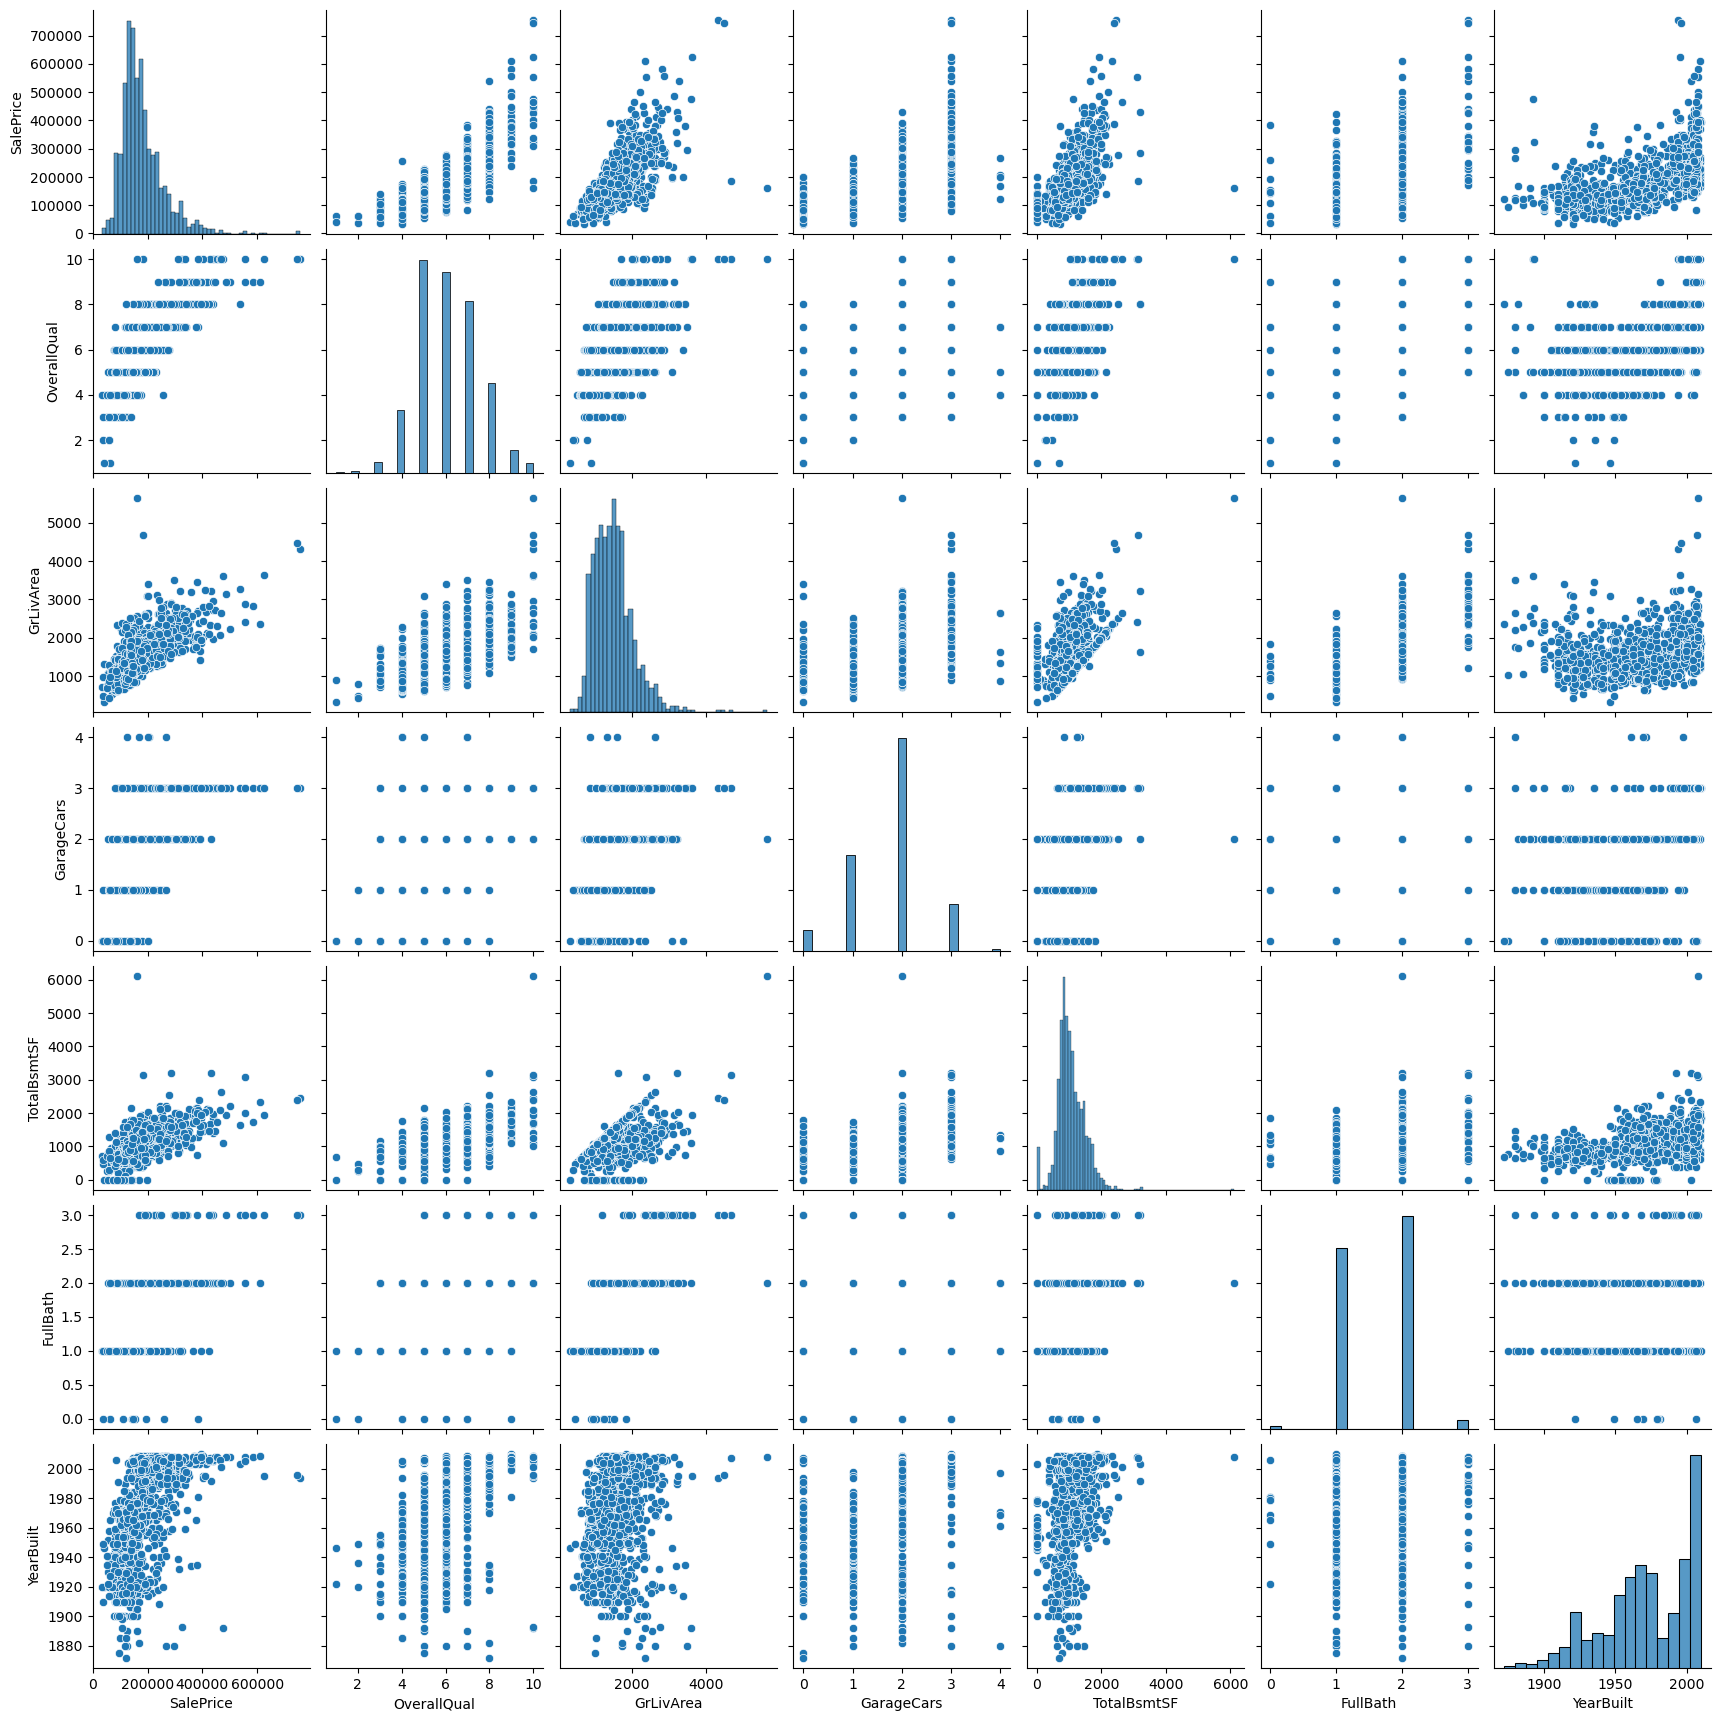

In [62]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols])

<a id="head-1-3"></a>
# Data Cleaning

<a id="head-1-3-1"></a>
## Missing Values
- How much missing data is there? 
- Are there patterns in the missing values or random?
- Should we drop certain columns due to too many missing values?

In [15]:
# Find missing values

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


### Visualize missing values at a glance with heatmap

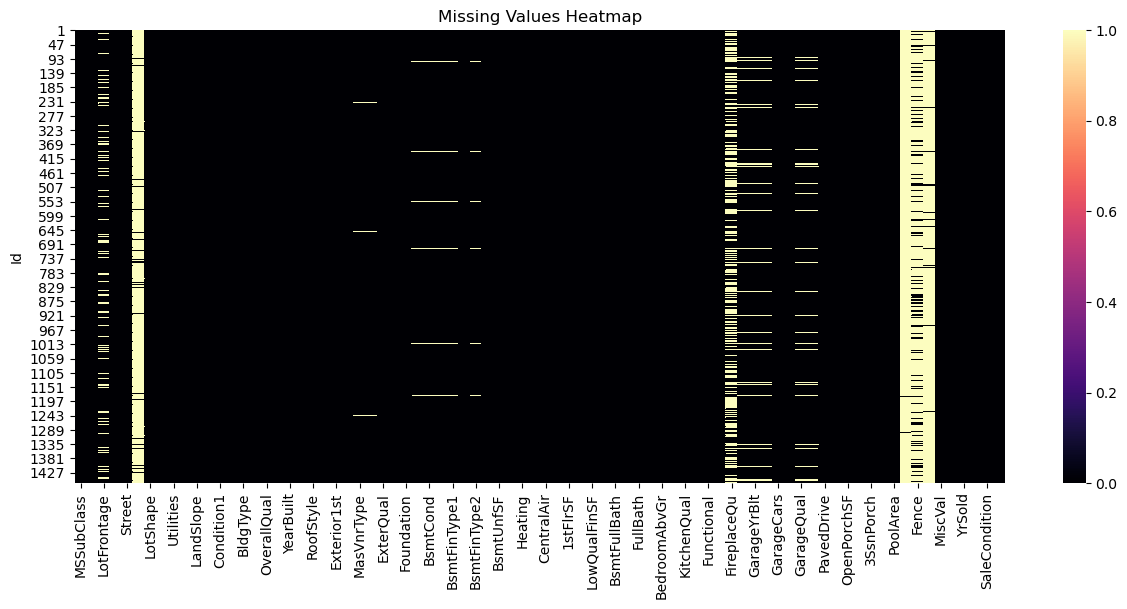

In [18]:
#Heatmap for the null values

plt.figure(figsize=(15,6))
plt.title('Missing Values Heatmap')
sns.heatmap(train.isnull(),cmap='magma');

- A lot of features are missing most of their data

In [19]:
# find columns with missing data
drop_cols = missing_data[missing_data['Total'] > 1]

In [20]:
high_corr = corr['SalePrice'].sort_values(ascending=False)[1:][:13].index

high_corr.isin(drop_cols)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

- Since these columns are not the highest correlated, we will drop them

In [21]:
# Drop columns with missing values 
train = train.drop(drop_cols.index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)

In [22]:
train.isnull().sum().max()

0

In [23]:
train['Utilities'].value_counts()

AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64

Utilities column only has one value in the second class --> useless for prediction so drop

In [24]:
del train['Utilities']

<a id="head-1-3-2"></a>
## Outliers
- Find a threshold that defines an observation as an outlier

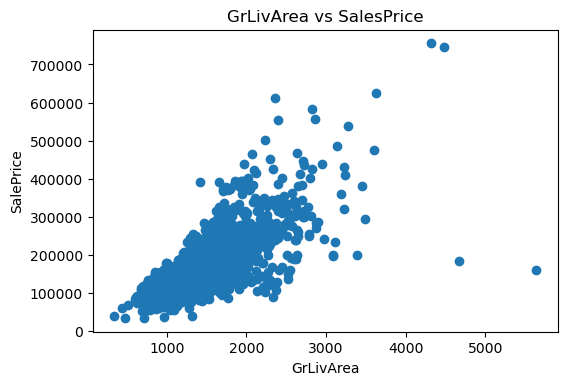

In [28]:
plt.scatter(train.GrLivArea, train.SalePrice)
plt.title("GrLivArea vs SalesPrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [25]:
# remove any houses with more than 4000 square feet from the dataset
train = train[train.GrLivArea < 4000]

In [26]:
#apply log transformation to overcome SalesPrice positive skewness
train['SalePrice'] = np.log(train['SalePrice'])

/Users/fernandamurillo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


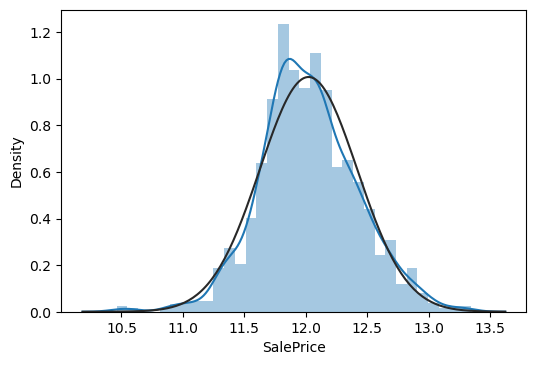

In [72]:
#check histogram after log transformation
sns.distplot(train['SalePrice'], fit=norm);

In [27]:
# same with GrLivArea
train['GrLivArea'] = np.log(train['GrLivArea'])

#### Check total basement

/Users/fernandamurillo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


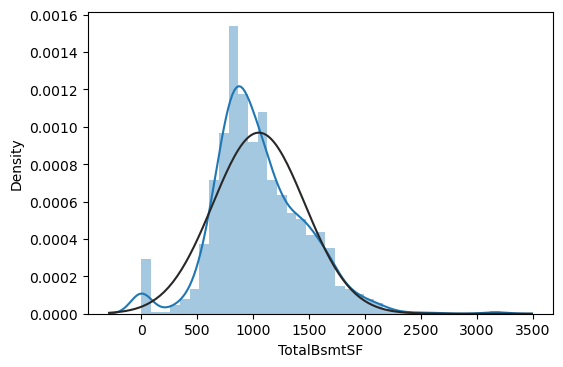

In [74]:
sns.distplot(train['TotalBsmtSF'], fit=norm);

In [75]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 61, dtype: int64

### Split data

In [28]:
# Seperate numerical features and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")

train_num = train[numerical_features]
train_cat = train[categorical_features]

In [29]:
y = train.SalePrice

In [30]:
# Create dummy features for categorical values via one-hot encoding
train_cat = pd.get_dummies(train_cat)

In [36]:
# split train and validation data
train = pd.concat([train_num, train_cat], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)

### Standardize

In [38]:
# Standardize numerical features
scaler = StandardScaler()
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

/Users/fernandamurillo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/Users/fernandamurillo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


<a id="head-4"></a>
## Modeling

- Use regularized linear regression models from the scikit learn module
- Try both l1(Lasso) and l2(Ridge) regularization

### Error for Scoring
- Define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning parameters

In [82]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

<a id="head-4-1"></a>
## Linear Regression
### Ridge

In [51]:
model_ridge = Ridge()

In [52]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

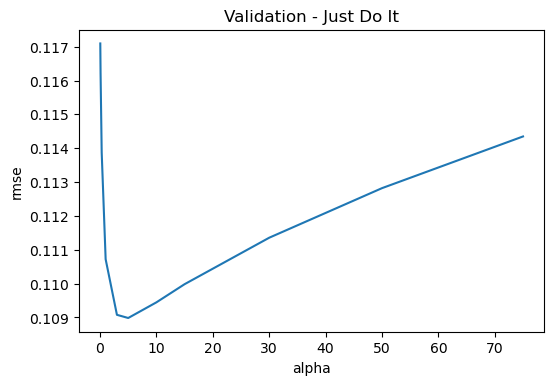

In [53]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

- Alpha of 10 seems good

In [54]:
cv_ridge.min()

0.10898260159986006

<a id="head-4-2"></a>
### LassoCV

In [56]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [57]:
rmse_cv(model_lasso).mean()

0.11044733300573636

- Let's look at the coefficients Lasso picked

In [59]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [62]:
coef_df = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

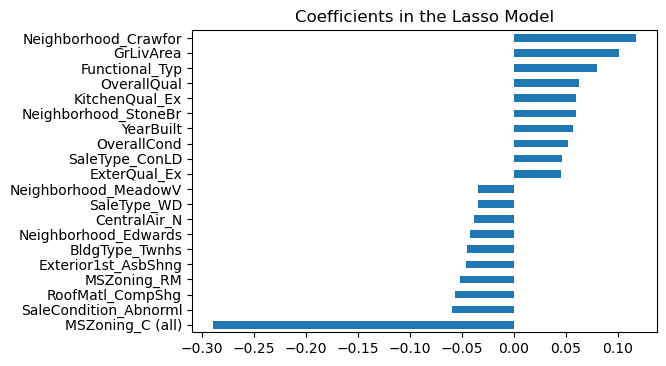

In [63]:
# horizonatal bar plot of Lasso's coefficients
coef_df.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

- The most important features the Lasso model picked are Neighborhood Crawford, GrLivArea, Functional_Type, OverallQual,etc. Some of these we have also seen are important through the EDA, others not so much

In [71]:
# Predict on test set
preds = model_lasso.predict(X_test)

In [73]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(rmse)

0.11908517093214815


<a id="head-4-3"></a>
### XGBoost

In [74]:
import xgboost as xgb

In [75]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

<AxesSubplot:>

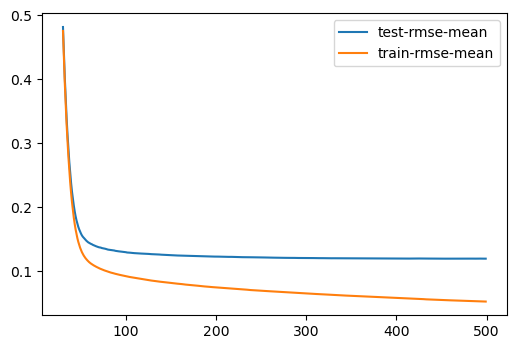

In [76]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [77]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) 
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=360, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
rmse= np.sqrt(-cross_val_score(model_xgb, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
print(rmse.mean())
# 0.12197845240959486

/Users/fernandamurillo/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/fernandamurillo/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/fernandamurillo/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/fernandamurillo/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.12197845240959486


/Users/fernandamurillo/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
